<a href="https://colab.research.google.com/github/Rajeswaril4/AI_dataset/blob/main/MultinomialNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [5]:
# Step 2: Load Dataset
url = "https://raw.githubusercontent.com/Rajeswaril4/AI_dataset/main/sampled_dataset.csv"

df = pd.read_csv(url)
print("Dataset loaded. Shape:", df.shape)

Dataset loaded. Shape: (20000, 4)


In [6]:
# Step 3: Combine Symptom Columns into One Text Field
df.fillna('', inplace=True)  # Replace NaNs with empty strings
df['Symptom_Text'] = df['Symptom1'] + ' ' + df['Symptom2'] + ' ' + df['Symptom3']

# Step 4: Prepare Data
X_text = df['Symptom_Text']
y = df['Disease']


In [7]:
# Encode Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 5: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_text)


In [8]:
# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y_encoded, test_size=0.2, random_state=42
)

In [9]:
# Step 7: Train Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [10]:
# Step 8: Evaluate
# Step 8: Predict and Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# FIXED REPORT: Handle label size mismatch
print("Classification Report:\n", classification_report(
    y_test, y_pred, labels=list(set(y_pred)), zero_division=0
))


Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
        8193       0.00      0.00      0.00       0.0
       16387       0.00      0.00      0.00       0.0
       16388       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
       16398       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       0.0
        8209       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       0.0
        8212       0.00      0.00      0.00       0.0
          21       0.00      0.00      0.00       0.0
       16406       0.00      0.00      0.00       0.0
          22       0.00      0.00      0.00       0.0
       16408       0.00      0.00      0.00       0.0
        8218       0.00      0.00      0.00

In [11]:
# Step 9: Save Model and Tools
joblib.dump(model, "text_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
print("Model, vectorizer, and label encoder saved.")

Model, vectorizer, and label encoder saved.


Accuracy: 0.0


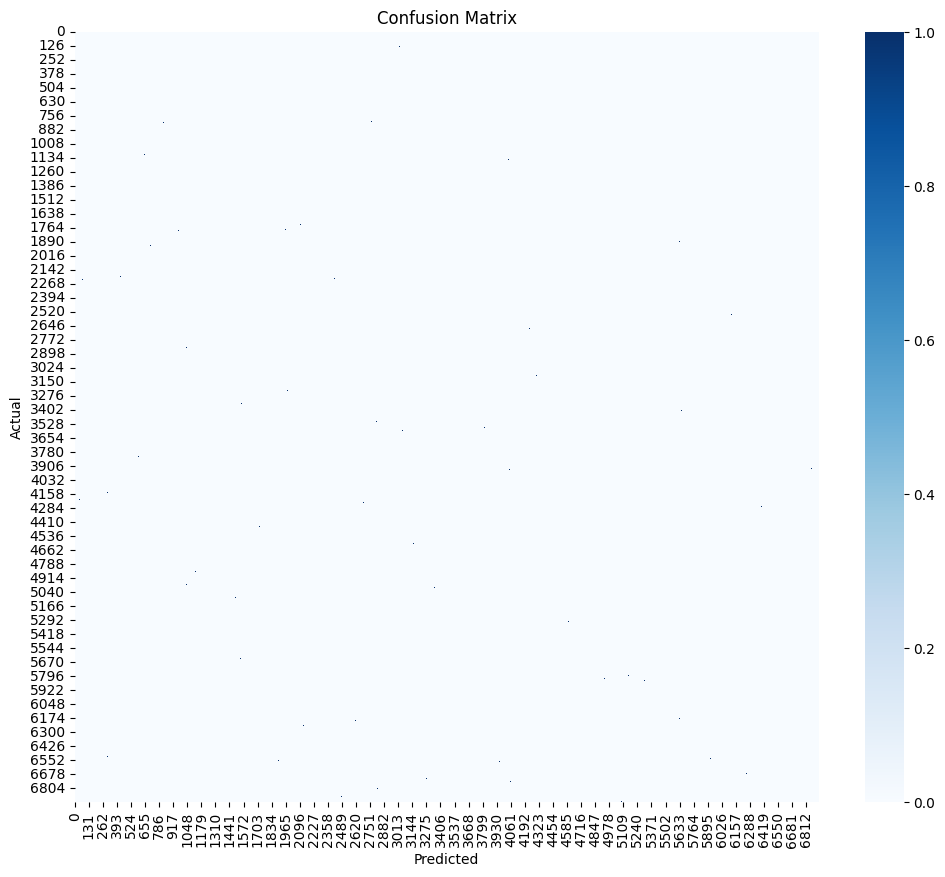

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Accuracy & classification report
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
from sklearn.metrics import classification_report

# Get only the unique classes used in y_test
unique_labels = sorted(set(y_test))

# Filter class names accordingly
filtered_class_names = label_encoder.inverse_transform(unique_labels)

# Now this will match



# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Accuracy: 1.0


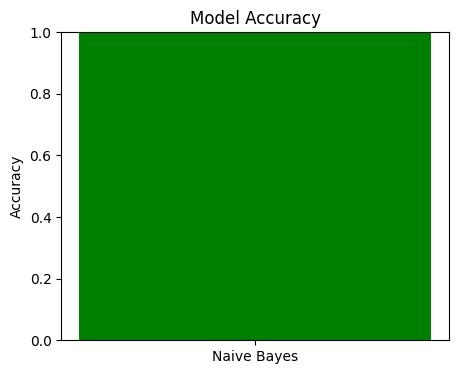

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Example values
y_test = [0, 1, 2, 1]
y_pred = [0, 1, 2, 1]

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

plt.figure(figsize=(5, 4))
plt.bar(['Naive Bayes'], [accuracy], color='green')
plt.ylim(0, 1)
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.show()



In [ ]:
import joblib

# Create a dictionary with all objects
model_data = {
    'model': model,
    'vectorizer': vectorizer,
    'label_encoder': label_encoder
}

# Save dictionary as one file
joblib.dump(model_data, "MultinomialNB.pkl")
print("Combined model file saved as combined_model.pkl")


Combined model file saved as combined_model.pkl


Model file downloaded.


KeyError: 10